In [3]:
import numpy as np
from experiments import data_utils
#import target_models
import pandas as pd

In [4]:
(x_train, y_train), (x_test, y_test), (x_shadow, y_shadow) = data_utils.load_purchase100(shadow_size=0.75)

./datasets/dataset_purchase


In [43]:
def label_count_and_plot_histogram(ys, nbins: int, normalize=True):
    print(ys.shape)
    s = pd.Series(np.argmax(ys, axis=1))
    print("\nLABEL   COUNT\n",s.value_counts(normalize))
    s.plot.hist(bins=nbins, density=normalize)

(197324, 100)

LABEL   COUNT
 18    0.026424
15    0.023616
2     0.023124
26    0.022557
22    0.019318
        ...   
46    0.003968
93    0.003081
65    0.003046
25    0.002757
29    0.000537
Length: 100, dtype: float64


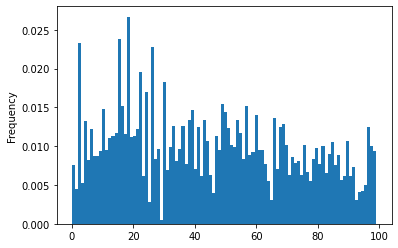

In [44]:
y_all = np.concatenate((y_train, y_test, y_shadow), axis=0)
label_count_and_plot_histogram(y_all, nbins=100)

In [45]:
#The ratios are evenly distributed across splits so there's no need to plot the rest
#count_and_plot_histogram(y_train)
#count_and_plot_histogram(y_test)
#count_and_plot_histogram(y_shadow)

In [84]:
def feature_count_and_plot_histogram(xs, nbins: int, normalize=True):
    xs = np.count_nonzero(xs, axis=1)
    print(xs.shape)
    s = pd.Series(xs)
    print("\nFEATURE   COUNT\n",s.value_counts(normalize))
    s.plot.hist(bins=nbins, density=normalize)

(197324,)

FEATURE   COUNT
 199    0.005874
207    0.005803
210    0.005798
193    0.005798
188    0.005798
         ...   
567    0.000005
74     0.000005
550    0.000005
455    0.000005
563    0.000005
Length: 501, dtype: float64


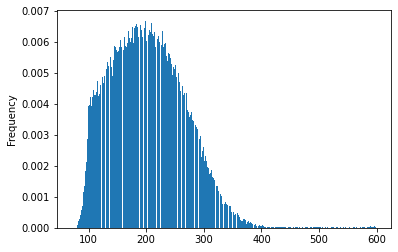

In [88]:
#Plot feature distribution for all data
x_all = np.concatenate((x_train, x_test, x_shadow), axis=0)
feature_count_and_plot_histogram(x_all, nbins=600, normalize=True)

In [106]:
def plot_all_histograms(x_all: np.ndarray, nb_classes: int, n_features: int, img_path: str, normalize=True):
    import matplotlib.pyplot as plt

    for i in range(nb_classes):
        image_path = img_path + "feature_histogram_class_" + str(i) + ".png"
        indices = np.where(np.argmax(y_train, axis=1) == i)
        xs = np.count_nonzero(x_all[indices], axis=1)
        s = pd.Series(xs)
        label="class " + str(i)
        ax = s.plot.hist(
            bins=nb_classes,
            density=normalize,
            range=(0, n_features),
            label=label
        )
        ax.legend([label])
        fig = ax.get_figure()
        plt.xlabel("Feature")
        fig.savefig(image_path)
        plt.clf()

In [107]:
x_all = np.concatenate((x_train, x_test, x_shadow), axis=0)
purchase100_feat_histogram_path = "./img/purchase100_feature_histograms/"
normalize = True
n_classes = 100
n_features = 600
plot_all_histograms(x_all, n_classes, n_features, purchase100_feat_histogram_path, normalize)

<Figure size 432x288 with 0 Axes>